# Etude des datas en enlevant la partie traitement du signal

## import et chargement des données

In [5]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
import networkx as nx
import scipy
import json
import sys
# sys.path.append('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/')

sys.path.append('../')
import utils
import settings
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [7]:
path = "../" # content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/"
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = utils.read_files(diff_path=path)
keys = [1, 2, 3]

In [8]:
test = pd.read_csv(path+"test.csv")
sample_submission = pd.read_csv(path+"sample_submission.csv")

In [9]:
train_a, _, _, X_train_estimated_a, _, _, X_train_observed_a, _, _, X_test_estimated_a, _, _ = utils.read_files(diff_path=path)
X_reshaped_train_estimated_a, _, _, X_reshaped_train_observed_a, _, _, X_reshaped_test_estimated_a, _, _ = utils.get_reshaped_files(diff_path='../')

In [44]:
X_test_estimated_a

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.1,1.207,2090.600098,0.0,0.0,1629.400024,0.0,282.700012,0.0,0.0,0.0,0.0,99.300003,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.299988,0.0,0.0,980.799988,986.700012,0.0,0.0,82.199997,992.599976,NaN,0.0,0.0,-0.0,0.0,351.855988,-3.282,0.1,285.399994,99.400002,39931.601562,2.1,1.7,-1.3,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.1,1.207,2015.800049,0.0,0.0,1537.300049,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.900024,986.799988,0.0,0.0,82.500000,992.700012,NaN,0.0,0.0,-0.0,0.0,355.317993,-3.469,0.1,285.299988,100.000000,39574.300781,2.0,1.6,-1.3,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.1,1.208,2015.699951,0.0,0.0,1471.400024,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,981.000000,986.900024,0.0,0.0,82.800003,992.799988,NaN,0.0,0.0,-0.0,0.0,358.785004,-3.556,0.1,285.299988,100.000000,39627.199219,2.0,1.6,-1.2,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,9.0,1.208,2015.599976,0.0,0.0,1405.500000,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,981.000000,986.900024,0.0,0.0,83.199997,992.900024,NaN,0.0,0.0,-0.0,0.0,2.253000,-3.541,0.1,285.200012,100.000000,39691.800781,2.0,1.6,-1.1,0.0


In [10]:
X_train_estimated_a

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.281,1173.900024,0.0,0.0,536.500000,0.0,272.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.400024,0.0,0.0,79.599998,1013.700012,NaN,0.0,0.0,-0.0,0.1,352.920013,-11.731000,0.1,274.200012,99.900002,11629.299805,3.9,2.9,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.299988,0.0,0.0,80.000000,1013.599976,NaN,0.0,0.0,-0.0,0.1,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.281,1435.800049,0.0,0.0,531.799988,0.0,272.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,1000.900024,1007.200012,0.0,0.0,79.900002,1013.500000,NaN,0.0,0.0,-0.0,0.1,0.352000,-11.928000,0.1,274.200012,99.900002,11230.799805,3.7,2.7,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.281,1817.400024,0.0,0.0,521.200012,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.799988,1007.000000,0.0,0.0,79.800003,1013.299988,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.864000,0.1,274.200012,99.599998,12526.099609,3.8,2.7,2.6,-0.0


In [11]:
X_train_observed_a

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,1.100000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.000000,0.0,0.0,1005.099976,1011.400024,0.0,0.0,83.800003,1017.700012,NaN,0.0,0.0,-0.0,0.0,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


### fusion de observed and estimated

In [12]:
X_a_reshaped = pd.concat([ X_reshaped_train_observed_a, X_reshaped_train_estimated_a])
# X_b_reshaped = pd.concat([X_reshaped_train_observed_b, X_reshaped_test_estimated_b])
# X_c_reshaped = pd.concat([X_reshaped_train_observed_c, X_reshaped_test_estimated_c])

In [13]:
X_reshaped_train_estimated_a["date_forecast_0"].min() - X_reshaped_train_observed_a["date_forecast_0"].max()

Timedelta('7 days 21:00:00')

In [14]:
X_a_reshaped

,date_forecast_0,absolute_humidity_2m:gm3_0,air_density_2m:kgm3_0,ceiling_height_agl:m_0,clear_sky_energy_1h:J_0,clear_sky_rad:W_0,cloud_base_agl:m_0,dew_or_rime:idx_0,dew_point_2m:K_0,diffuse_rad:W_0,diffuse_rad_1h:J_0,direct_rad:W_0,direct_rad_1h:J_0,effective_cloud_cover:p_0,elevation:m_0,fresh_snow_12h:cm_0,fresh_snow_1h:cm_0,fresh_snow_24h:cm_0,fresh_snow_3h:cm_0,fresh_snow_6h:cm_0,is_day:idx_0,is_in_shadow:idx_0,msl_pressure:hPa_0,precip_5min:mm_0,precip_type_5min:idx_0,pressure_100m:hPa_0,pressure_50m:hPa_0,prob_rime:p_0,rain_water:kgm2_0,relative_humidity_1000hPa:p_0,sfc_pressure:hPa_0,snow_density:kgm3_0,snow_depth:cm_0,snow_drift:idx_0,snow_melt_10min:mm_0,snow_water:kgm2_0,sun_azimuth:d_0,sun_elevation:d_0,super_cooled_liquid_water:kgm2_0,t_1000hPa:K_0,total_cloud_cover:p_0,visibility:m_0,wind_speed_10m:ms_0,wind_speed_u_10m:ms_0,wind_speed_v_10m:ms_0,wind_speed_w_1000hPa:ms_0,date_forecast_1,absolute_humidity_2m:gm3_1,air_density_2m:kgm3_1,ceiling_height_agl:m_1,clear_sky_energy_1h:J_1,clear_sky_rad:W_1,cloud_base_agl:m_1,dew_or_rime:idx_1,dew_point_2m:K_1,diffuse_rad:W_1,diffuse_rad_1h:J_1,direct_rad:W_1,direct_rad_1h:J_1,effective_cloud_cover:p_1,elevation:m_1,fresh_snow_12h:cm_1,fresh_snow_1h:cm_1,fresh_snow_24h:cm_1,fresh_snow_3h:cm_1,fresh_snow_6h:cm_1,is_day:idx_1,is_in_shadow:idx_1,msl_pressure:hPa_1,precip_5min:mm_1,precip_type_5min:idx_1,pressure_100m:hPa_1,pressure_50m:hPa_1,prob_rime:p_1,rain_water:kgm2_1,relative_humidity_1000hPa:p_1,sfc_pressure:hPa_1,snow_density:kgm3_1,snow_depth:cm_1,snow_drift:idx_1,snow_melt_10min:mm_1,snow_water:kgm2_1,sun_azimuth:d_1,sun_elevation:d_1,super_cooled_liquid_water:kgm2_1,t_1000hPa:K_1,total_cloud_cover:p_1,visibility:m_1,wind_speed_10m:ms_1,wind_speed_u_10m:ms_1,wind_speed_v_10m:ms_1,wind_speed_w_1000hPa:ms_1,date_forecast_2,absolute_humidity_2m:gm3_2,air_density_2m:kgm3_2,ceiling_height_agl:m_2,clear_sky_energy_1h:J_2,clear_sky_rad:W_2,cloud_base_agl:m_2,dew_or_rime:idx_2,dew_point_2m:K_2,diffuse_rad:W_2,diffuse_rad_1h:J_2,direct_rad:W_2,direct_rad_1h:J_2,effective_cloud_cover:p_2,elevation:m_2,fresh_snow_12h:cm_2,fresh_snow_1h:cm_2,fresh_snow_24h:cm_2,fresh_snow_3h:cm_2,fresh_snow_6h:cm_2,is_day:idx_2,is_in_shadow:idx_2,msl_pressure:hPa_2,precip_5min:mm_2,precip_type_5min:idx_2,pressure_100m:hPa_2,pressure_50m:hPa_2,prob_rime:p_2,rain_water:kgm2_2,relative_humidity_1000hPa:p_2,sfc_pressure:hPa_2,snow_density:kgm3_2,snow_depth:cm_2,snow_drift:idx_2,snow_melt_10min:mm_2,snow_water:kgm2_2,sun_azimuth:d_2,sun_elevation:d_2,super_cooled_liquid_water:kgm2_2,t_1000hPa:K_2,total_cloud_cover:p_2,visibility:m_2,wind_speed_10m:ms_2,wind_speed_u_10m:ms_2,wind_speed_v_10m:ms_2,wind_speed_w_1000hPa:ms_2,date_forecast_3,absolute_humidity_2m:gm3_3,air_density_2m:kgm3_3,ceiling_height_agl:m_3,clear_sky_energy_1h:J_3,clear_sky_rad:W_3,cloud_base_agl:m_3,dew_or_rime:idx_3,dew_point_2m:K_3,diffuse_rad:W_3,diffuse_rad_1h:J_3,direct_rad:W_3,direct_rad_1h:J_3,effective_cloud_cover:p_3,elevation:m_3,fresh_snow_12h:cm_3,fresh_snow_1h:cm_3,fresh_snow_24h:cm_3,fresh_snow_3h:cm_3,fresh_snow_6h:cm_3,is_day:idx_3,is_in_shadow:idx_3,msl_pressure:hPa_3,precip_5min:mm_3,precip_type_5min:idx_3,pressure_100m:hPa_3,pressure_50m:hPa_3,prob_rime:p_3,rain_water:kgm2_3,relative_humidity_1000hPa:p_3,sfc_pressure:hPa_3,snow_density:kgm3_3,snow_depth:cm_3,snow_drift:idx_3,snow_melt_10min:mm_3,snow_water:kgm2_3,sun_azimuth:d_3,sun_elevation:d_3,super_cooled_liquid_water:kgm2_3,t_1000hPa:K_3,total_cloud_cover:p_3,visibility:m_3,wind_speed_10m:ms_3,wind_speed_u_10m:ms_3,wind_speed_v_10m:ms_3,wind_speed_w_1000hPa:ms_3
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.0,1744.900024,0.0,280.299988,0.0,0.000000,0.0,0.000000,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.000000,0.000000,1734.000000,0.0,2

## Chargement du modèle

In [15]:
# lire le dico contenant le modèle :

lien_fichier = "dico"

with open(lien_fichier +'.json', 'r') as fichier:
    model = json.load(fichier)

In [ ]:
def recuperation_model(fft_values, threshold=0.4 * 10**6):

      sample_rate = 1 # 0.0002762459597837071

      # Obtenez les fréquences correspondant aux valeurs FFT
      n = len(fft_values)
      frequencies = np.fft.fftfreq(n, 1 / sample_rate)

      # Filtrage et calcul des amplitudes
      amplitudes = np.abs(fft_values) * (np.abs(fft_values) > threshold)

      # Obtenez les phases des valeurs FFT
      phases = np.angle(fft_values)

      return frequencies, amplitudes, phases

In [16]:
# fonction pour le model
def prediction_TS(model,liste):
    frequencies = model["frequencies"]
    amplitudes = model["amplitudes"]
    phases = model["phases"]
    Te = 3619.962445 # à définir (normalement c'est une heure)
    resultat = []
    for i in liste:
    # for i in range(len(liste)):
        # Te = 3600 # 
        # Te = 3619.962445 # à définir (normalement c'est une heure)
        aux = 0
        for i_freq in range(len(frequencies)):
        # for i in frequencies:
          if amplitudes[i_freq]>0 :
            # Te = Te if i == 0 else (liste[i] - liste[i - 1]) * 3600
            # aux +=  amplitudes[i_freq] * np.cos(2 * np.pi * frequencies[i_freq] * i * Te + phases[i_freq]) / Te
            aux +=  amplitudes[i_freq] * np.cos(2 * np.pi * frequencies[i_freq] * i * Te + phases[i_freq]) / Te
        resultat.append(aux)
    return resultat

In [17]:
# passer des dates aux heure de notre modèle :
def conversion_date(date):
  return (date-1.5595128e+18)/3600000000000.0

In [18]:
def df_to_prediction(Serie):
  TS = Serie.values.astype("float64")
  TS_translate = conversion_date(TS)
  result_pred = prediction_TS(model, TS_translate)
  return result_pred


In [19]:
# prédiction sur A
train_a = train_a.rename(columns={'time': 'date_forecast_0'})
result_pred_a2 = df_to_prediction(pd.DataFrame(train_a["date_forecast_0"].values.astype("datetime64[ns]")))
result_pred_ao = df_to_prediction(X_a_reshaped["date_forecast_0"])
# on fait aussi sur B et C car il y a des troues !
# result_pred_b = df_to_prediction(X_b_reshaped["date_forecast_0"])
# result_pred_c = df_to_prediction(X_c_reshaped["date_forecast_0"])

In [20]:
result_pred_a = [ pred[0] for pred in result_pred_a2 ]

In [21]:
result_pred_a

[-1328.9790302696779,
 -1456.1533951974775,
 -1752.4059449222466,
 -1544.1882025700718,
 -113.92189027309948,
 2922.7846020245915,
 7385.299332433577,
 12558.83211039443,
 17467.41015857123,
 21244.62458684723,
 23415.946090742687,
 23966.810874292023,
 23195.554557341213,
 21466.44734897146,
 19019.875043322147,
 15943.777168393768,
 12298.618914177041,
 8287.17113378084,
 4331.897644732442,
 983.676413633005,
 -1301.9333761219227,
 -2390.409557769404,
 -2549.259941796919,
 -2312.887818349762,
 -2185.07311998521,
 -2334.6415624742467,
 -2456.643607668068,
 -1889.4244099629236,
 59.11636671657993,
 3738.592612141224,
 8928.022869534563,
 14869.210983944324,
 20541.187974877797,
 25032.21538541859,
 27824.19668009123,
 28864.365772942914,
 28423.178794393647,
 26852.607074551688,
 24400.23472085275,
 21181.630464914157,
 17302.23614898626,
 13020.012223448426,
 8812.659495540824,
 5274.95959890473,
 2884.627099761907,
 1769.2451638151197,
 1622.6668238582579,
 1843.272763317095,
 1840.4

In [22]:
result_pred_ao == result_pred_a

False

In [23]:
TS = train_a["date_forecast_0"].values.astype("datetime64[ns]").astype("float64")

In [24]:
c = 0.
c2 = 0
for k in conversion_date(TS):
    if k != c: 
        print(k, c2, k - c)
    c = k + 1
    c2 += 1

29856.0 29667 189.0


In [25]:
len(conversion_date(TS))#[29667:29669]

34085

In [26]:
X_a_reshaped[29667:29669]

,date_forecast_0,absolute_humidity_2m:gm3_0,air_density_2m:kgm3_0,ceiling_height_agl:m_0,clear_sky_energy_1h:J_0,clear_sky_rad:W_0,cloud_base_agl:m_0,dew_or_rime:idx_0,dew_point_2m:K_0,diffuse_rad:W_0,diffuse_rad_1h:J_0,direct_rad:W_0,direct_rad_1h:J_0,effective_cloud_cover:p_0,elevation:m_0,fresh_snow_12h:cm_0,fresh_snow_1h:cm_0,fresh_snow_24h:cm_0,fresh_snow_3h:cm_0,fresh_snow_6h:cm_0,is_day:idx_0,is_in_shadow:idx_0,msl_pressure:hPa_0,precip_5min:mm_0,precip_type_5min:idx_0,pressure_100m:hPa_0,pressure_50m:hPa_0,prob_rime:p_0,rain_water:kgm2_0,relative_humidity_1000hPa:p_0,sfc_pressure:hPa_0,snow_density:kgm3_0,snow_depth:cm_0,snow_drift:idx_0,snow_melt_10min:mm_0,snow_water:kgm2_0,sun_azimuth:d_0,sun_elevation:d_0,super_cooled_liquid_water:kgm2_0,t_1000hPa:K_0,total_cloud_cover:p_0,visibility:m_0,wind_speed_10m:ms_0,wind_speed_u_10m:ms_0,wind_speed_v_10m:ms_0,wind_speed_w_1000hPa:ms_0,date_forecast_1,absolute_humidity_2m:gm3_1,air_density_2m:kgm3_1,ceiling_height_agl:m_1,clear_sky_energy_1h:J_1,clear_sky_rad:W_1,cloud_base_agl:m_1,dew_or_rime:idx_1,dew_point_2m:K_1,diffuse_rad:W_1,diffuse_rad_1h:J_1,direct_rad:W_1,direct_rad_1h:J_1,effective_cloud_cover:p_1,elevation:m_1,fresh_snow_12h:cm_1,fresh_snow_1h:cm_1,fresh_snow_24h:cm_1,fresh_snow_3h:cm_1,fresh_snow_6h:cm_1,is_day:idx_1,is_in_shadow:idx_1,msl_pressure:hPa_1,precip_5min:mm_1,precip_type_5min:idx_1,pressure_100m:hPa_1,pressure_50m:hPa_1,prob_rime:p_1,rain_water:kgm2_1,relative_humidity_1000hPa:p_1,sfc_pressure:hPa_1,snow_density:kgm3_1,snow_depth:cm_1,snow_drift:idx_1,snow_melt_10min:mm_1,snow_water:kgm2_1,sun_azimuth:d_1,sun_elevation:d_1,super_cooled_liquid_water:kgm2_1,t_1000hPa:K_1,total_cloud_cover:p_1,visibility:m_1,wind_speed_10m:ms_1,wind_speed_u_10m:ms_1,wind_speed_v_10m:ms_1,wind_speed_w_1000hPa:ms_1,date_forecast_2,absolute_humidity_2m:gm3_2,air_density_2m:kgm3_2,ceiling_height_agl:m_2,clear_sky_energy_1h:J_2,clear_sky_rad:W_2,cloud_base_agl:m_2,dew_or_rime:idx_2,dew_point_2m:K_2,diffuse_rad:W_2,diffuse_rad_1h:J_2,direct_rad:W_2,direct_rad_1h:J_2,effective_cloud_cover:p_2,elevation:m_2,fresh_snow_12h:cm_2,fresh_snow_1h:cm_2,fresh_snow_24h:cm_2,fresh_snow_3h:cm_2,fresh_snow_6h:cm_2,is_day:idx_2,is_in_shadow:idx_2,msl_pressure:hPa_2,precip_5min:mm_2,precip_type_5min:idx_2,pressure_100m:hPa_2,pressure_50m:hPa_2,prob_rime:p_2,rain_water:kgm2_2,relative_humidity_1000hPa:p_2,sfc_pressure:hPa_2,snow_density:kgm3_2,snow_depth:cm_2,snow_drift:idx_2,snow_melt_10min:mm_2,snow_water:kgm2_2,sun_azimuth:d_2,sun_elevation:d_2,super_cooled_liquid_water:kgm2_2,t_1000hPa:K_2,total_cloud_cover:p_2,visibility:m_2,wind_speed_10m:ms_2,wind_speed_u_10m:ms_2,wind_speed_v_10m:ms_2,wind_speed_w_1000hPa:ms_2,date_forecast_3,absolute_humidity_2m:gm3_3,air_density_2m:kgm3_3,ceiling_height_agl:m_3,clear_sky_energy_1h:J_3,clear_sky_rad:W_3,cloud_base_agl:m_3,dew_or_rime:idx_3,dew_point_2m:K_3,diffuse_rad:W_3,diffuse_rad_1h:J_3,direct_rad:W_3,direct_rad_1h:J_3,effective_cloud_cover:p_3,elevation:m_3,fresh_snow_12h:cm_3,fresh_snow_1h:cm_3,fresh_snow_24h:cm_3,fresh_snow_3h:cm_3,fresh_snow_6h:cm_3,is_day:idx_3,is_in_shadow:idx_3,msl_pressure:hPa_3,precip_5min:mm_3,precip_type_5min:idx_3,pressure_100m:hPa_3,pressure_50m:hPa_3,prob_rime:p_3,rain_water:kgm2_3,relative_humidity_1000hPa:p_3,sfc_pressure:hPa_3,snow_density:kgm3_3,snow_depth:cm_3,snow_drift:idx_3,snow_melt_10min:mm_3,snow_water:kgm2_3,sun_azimuth:d_3,sun_elevation:d_3,super_cooled_liquid_water:kgm2_3,t_1000hPa:K_3,total_cloud_cover:p_3,visibility:m_3,wind_speed_10m:ms_3,wind_speed_u_10m:ms_3,wind_speed_v_10m:ms_3,wind_speed_w_1000hPa:ms_3
29667,2022-10-21 01:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,0.5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1017.900024,0.0,0.0,1005.0,1011.299988,0.0,0.0,84.099998,1017.599976,NaN,0.0,0.0,-0.0,0.0,34.306999,-33.417000,0.0,276.399994,0.5,36795.000000,1.5,-1.1,1.0,-0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [27]:
a = conversion_date(TS)[len(X_reshaped_train_observed_a) + 2136:len(X_reshaped_train_observed_a) + 2140]
a[2] # - a[1]

31995.0

In [28]:
coeff_A = 1/9.5
# coeff_B = coeff_A/4
# coeff_C = coeff_A/5

result_A = np.array(result_pred_a)*coeff_A
# result_B = np.array(result_pred_b)*coeff_B
# result_C = np.array(result_pred_c)*coeff_C

In [29]:
result_A

array([-139.8925295 , -153.27930476, -184.46378368, ...,  923.31289553,
        520.28217575,  235.3691353 ])

In [30]:
X_a_reshaped[:31807]

,date_forecast_0,absolute_humidity_2m:gm3_0,air_density_2m:kgm3_0,ceiling_height_agl:m_0,clear_sky_energy_1h:J_0,clear_sky_rad:W_0,cloud_base_agl:m_0,dew_or_rime:idx_0,dew_point_2m:K_0,diffuse_rad:W_0,diffuse_rad_1h:J_0,direct_rad:W_0,direct_rad_1h:J_0,effective_cloud_cover:p_0,elevation:m_0,fresh_snow_12h:cm_0,fresh_snow_1h:cm_0,fresh_snow_24h:cm_0,fresh_snow_3h:cm_0,fresh_snow_6h:cm_0,is_day:idx_0,is_in_shadow:idx_0,msl_pressure:hPa_0,precip_5min:mm_0,precip_type_5min:idx_0,pressure_100m:hPa_0,pressure_50m:hPa_0,prob_rime:p_0,rain_water:kgm2_0,relative_humidity_1000hPa:p_0,sfc_pressure:hPa_0,snow_density:kgm3_0,snow_depth:cm_0,snow_drift:idx_0,snow_melt_10min:mm_0,snow_water:kgm2_0,sun_azimuth:d_0,sun_elevation:d_0,super_cooled_liquid_water:kgm2_0,t_1000hPa:K_0,total_cloud_cover:p_0,visibility:m_0,wind_speed_10m:ms_0,wind_speed_u_10m:ms_0,wind_speed_v_10m:ms_0,wind_speed_w_1000hPa:ms_0,date_forecast_1,absolute_humidity_2m:gm3_1,air_density_2m:kgm3_1,ceiling_height_agl:m_1,clear_sky_energy_1h:J_1,clear_sky_rad:W_1,cloud_base_agl:m_1,dew_or_rime:idx_1,dew_point_2m:K_1,diffuse_rad:W_1,diffuse_rad_1h:J_1,direct_rad:W_1,direct_rad_1h:J_1,effective_cloud_cover:p_1,elevation:m_1,fresh_snow_12h:cm_1,fresh_snow_1h:cm_1,fresh_snow_24h:cm_1,fresh_snow_3h:cm_1,fresh_snow_6h:cm_1,is_day:idx_1,is_in_shadow:idx_1,msl_pressure:hPa_1,precip_5min:mm_1,precip_type_5min:idx_1,pressure_100m:hPa_1,pressure_50m:hPa_1,prob_rime:p_1,rain_water:kgm2_1,relative_humidity_1000hPa:p_1,sfc_pressure:hPa_1,snow_density:kgm3_1,snow_depth:cm_1,snow_drift:idx_1,snow_melt_10min:mm_1,snow_water:kgm2_1,sun_azimuth:d_1,sun_elevation:d_1,super_cooled_liquid_water:kgm2_1,t_1000hPa:K_1,total_cloud_cover:p_1,visibility:m_1,wind_speed_10m:ms_1,wind_speed_u_10m:ms_1,wind_speed_v_10m:ms_1,wind_speed_w_1000hPa:ms_1,date_forecast_2,absolute_humidity_2m:gm3_2,air_density_2m:kgm3_2,ceiling_height_agl:m_2,clear_sky_energy_1h:J_2,clear_sky_rad:W_2,cloud_base_agl:m_2,dew_or_rime:idx_2,dew_point_2m:K_2,diffuse_rad:W_2,diffuse_rad_1h:J_2,direct_rad:W_2,direct_rad_1h:J_2,effective_cloud_cover:p_2,elevation:m_2,fresh_snow_12h:cm_2,fresh_snow_1h:cm_2,fresh_snow_24h:cm_2,fresh_snow_3h:cm_2,fresh_snow_6h:cm_2,is_day:idx_2,is_in_shadow:idx_2,msl_pressure:hPa_2,precip_5min:mm_2,precip_type_5min:idx_2,pressure_100m:hPa_2,pressure_50m:hPa_2,prob_rime:p_2,rain_water:kgm2_2,relative_humidity_1000hPa:p_2,sfc_pressure:hPa_2,snow_density:kgm3_2,snow_depth:cm_2,snow_drift:idx_2,snow_melt_10min:mm_2,snow_water:kgm2_2,sun_azimuth:d_2,sun_elevation:d_2,super_cooled_liquid_water:kgm2_2,t_1000hPa:K_2,total_cloud_cover:p_2,visibility:m_2,wind_speed_10m:ms_2,wind_speed_u_10m:ms_2,wind_speed_v_10m:ms_2,wind_speed_w_1000hPa:ms_2,date_forecast_3,absolute_humidity_2m:gm3_3,air_density_2m:kgm3_3,ceiling_height_agl:m_3,clear_sky_energy_1h:J_3,clear_sky_rad:W_3,cloud_base_agl:m_3,dew_or_rime:idx_3,dew_point_2m:K_3,diffuse_rad:W_3,diffuse_rad_1h:J_3,direct_rad:W_3,direct_rad_1h:J_3,effective_cloud_cover:p_3,elevation:m_3,fresh_snow_12h:cm_3,fresh_snow_1h:cm_3,fresh_snow_24h:cm_3,fresh_snow_3h:cm_3,fresh_snow_6h:cm_3,is_day:idx_3,is_in_shadow:idx_3,msl_pressure:hPa_3,precip_5min:mm_3,precip_type_5min:idx_3,pressure_100m:hPa_3,pressure_50m:hPa_3,prob_rime:p_3,rain_water:kgm2_3,relative_humidity_1000hPa:p_3,sfc_pressure:hPa_3,snow_density:kgm3_3,snow_depth:cm_3,snow_drift:idx_3,snow_melt_10min:mm_3,snow_water:kgm2_3,sun_azimuth:d_3,sun_elevation:d_3,super_cooled_liquid_water:kgm2_3,t_1000hPa:K_3,total_cloud_cover:p_3,visibility:m_3,wind_speed_10m:ms_3,wind_speed_u_10m:ms_3,wind_speed_v_10m:ms_3,wind_speed_w_1000hPa:ms_3
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.0,1744.900024,0.0,280.299988,0.0,0.000000,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.00,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.000000,0.000000,1734.000000,0.0,28

In [31]:
X_a_reshaped["TS"] = result_A[:len(X_a_reshaped)] 
# X_a_reshaped["TS"] = np.concatenate((result_A[:31806], result_A[31806 + 23:])) # result_A
# X_b_reshaped["TS"] = result_B
# X_c_reshaped["TS"] = result_C

train_a.rename(columns={'time': 'date_forecast_0'}, inplace=True)
# train_b.rename(columns={'time': 'date_forecast_0'}, inplace=True)
# train_c.rename(columns={'time': 'date_forecast_0'}, inplace=True)

df_A = pd.merge(X_a_reshaped, train_a, on='date_forecast_0', how='inner')
# df_B = pd.merge(X_b_reshaped, train_b, on='date_forecast_0', how='inner')
# df_C = pd.merge(X_c_reshaped, train_c, on='date_forecast_0', how='inner')

df_A["diff"] = df_A["pv_measurement"] - df_A["TS"]
# df_B["diff"] = df_B["pv_measurement"] - df_B["TS"]
# df_C["diff"] = df_C["pv_measurement"] - df_C["TS"]

Text(0.5, 1.0, 'TS')

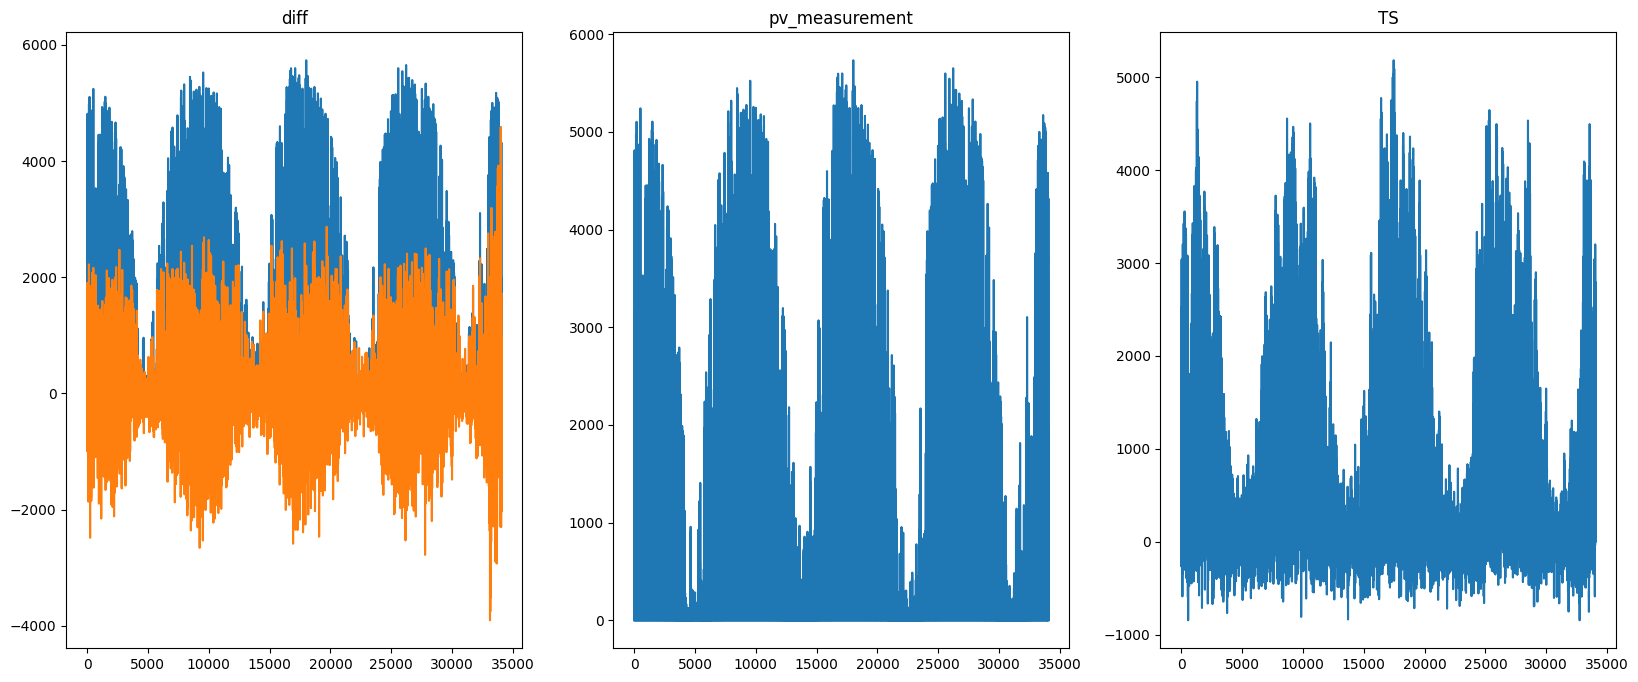

In [32]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.plot(df_A["pv_measurement"])
plt.plot(df_A["diff"])
plt.title("diff")
plt.subplot(1, 3, 2)
plt.plot(df_A["pv_measurement"])
plt.title("pv_measurement")
plt.subplot(1, 3, 3)
plt.plot(df_A["TS"])
plt.title("TS")

In [33]:
correlations = df_A.corr()["diff"]

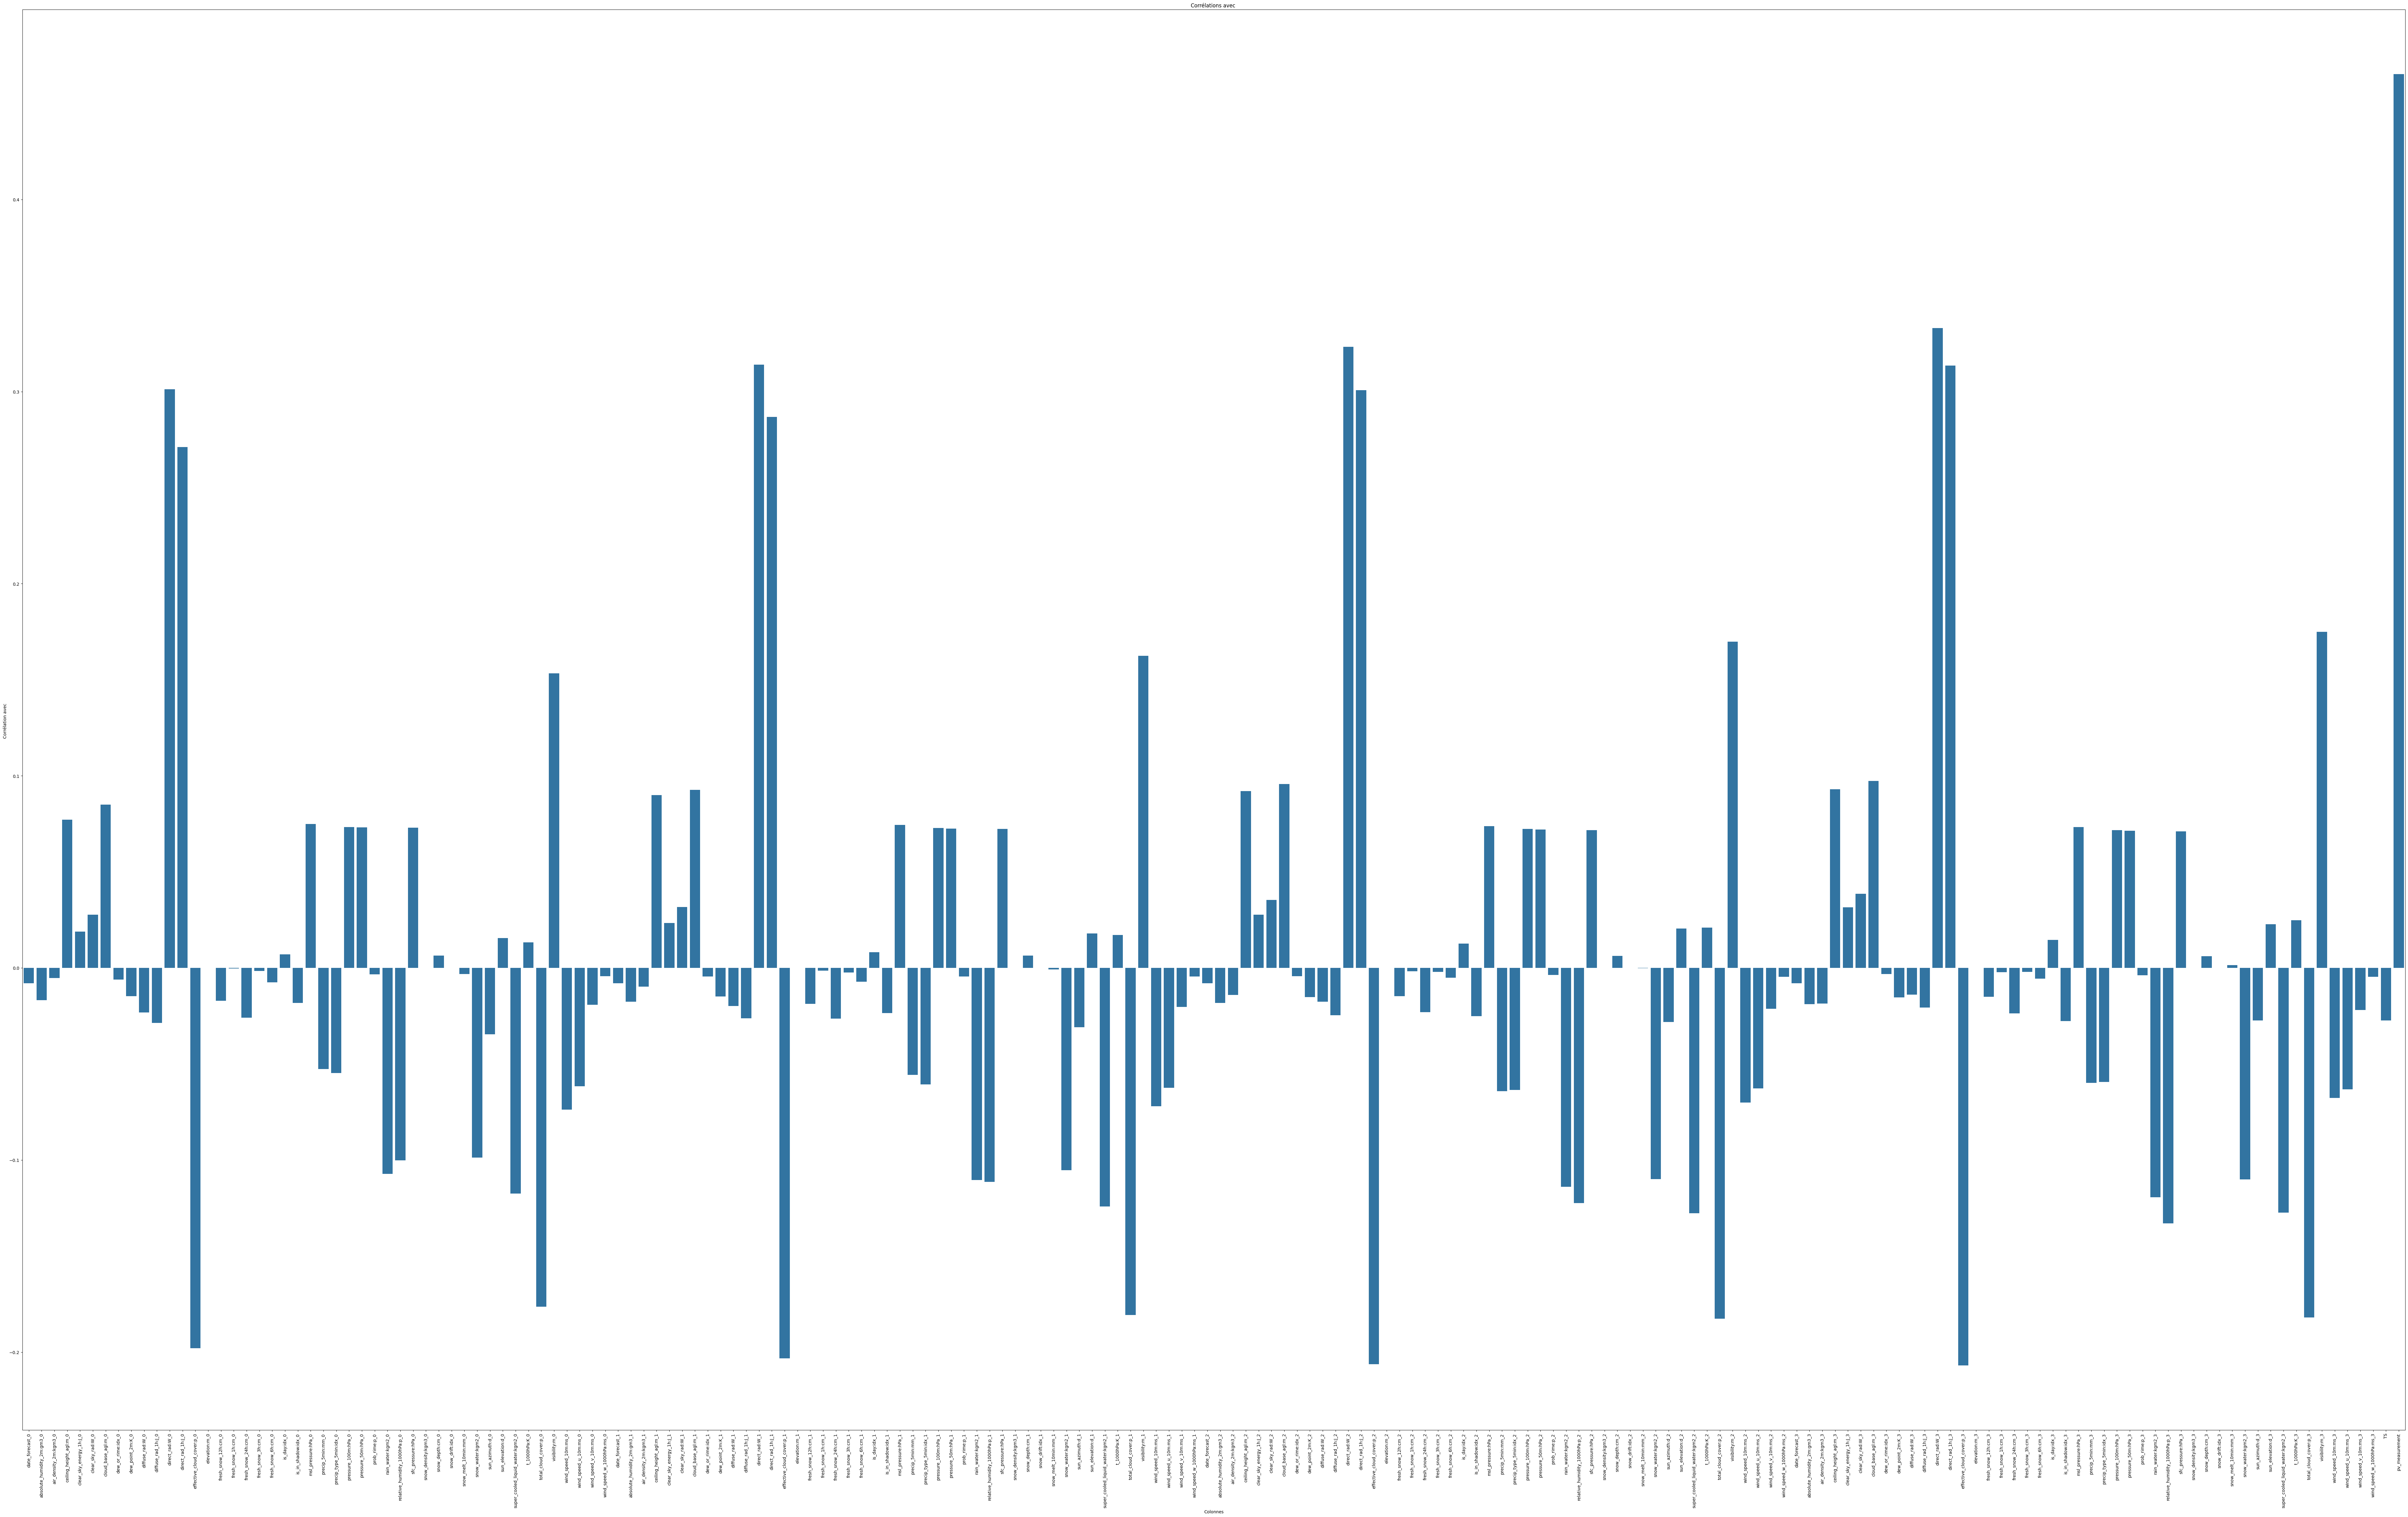

In [34]:
# Créez un graphique de barres pour visualiser les corrélations
plt.figure(figsize=(100, 60))
sns.barplot(x=correlations.index[:-1], y=correlations.values[:-1])
plt.xlabel("Colonnes")
plt.ylabel(f"Corrélation avec ")
plt.title(f"Corrélations avec ")
plt.xticks(rotation=90)
plt.show()

In [35]:
from scipy.fft import fft, ifft
from scipy.signal import find_peaks

In [36]:
# Analyse de la fréquence du signal
signal = df_A["TS"].values
# time_diff = df_A["date_forecast_0"].diff().mean().total_seconds()  # Obtenez la durée moyenne entre deux échantillons en secondes
time_diff = (df_A["date_forecast_0"][1] - df_A["date_forecast_0"][0]).total_seconds()  # Obtenez la durée moyenne entre deux échantillons en secondes
sampling_rate = 1 / time_diff  # Taux d'échantillonnage en Hz

# Effectuer la transformation de Fourier pour obtenir les composantes de fréquence
n = len(signal)
frequencies = np.fft.fftfreq(n, 1 / sampling_rate)
fft_values = fft(signal)
amplitudes = np.abs(fft_values)
phases = np.angle(fft_values)

In [37]:
df_A["date_forecast_0"].diff().mean()

Timedelta('0 days 01:00:22.513211978')

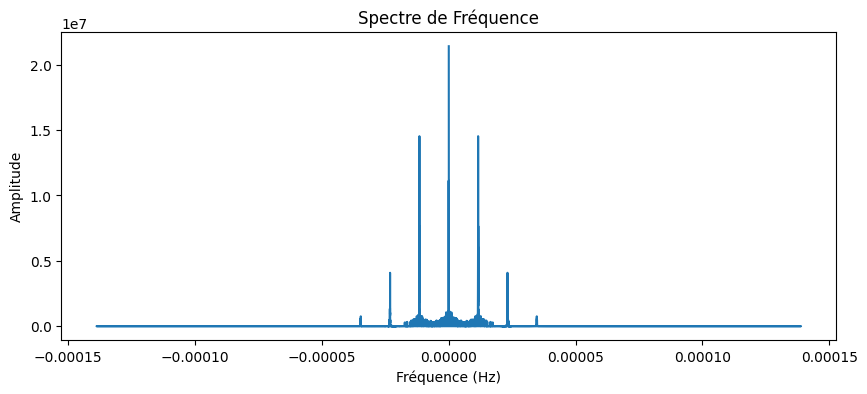

In [38]:
# Affichez le spectre de fréquence
plt.figure(figsize=(10, 4))
plt.plot(frequencies, amplitudes)
plt.title("Spectre de Fréquence")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
# plt.xlim(-10**-4, 10**-4)  # Limitez l'affichage des fréquences
plt.show()

In [39]:
1/0.000012/3600

23.148148148148145

In [40]:
# reconstruction avec filtre :
def filtrage(fft_values,threshold = 0.8*10**6):
  compteur = 0
  fft_filtre = []
  for i in range(len(fft_values)) :
    if threshold < np.abs(fft_values[i]) :
      fft_filtre.append(fft_values[i])
      compteur +=1
    else : fft_filtre.append(0)
  reconstruit_filtré = np.fft.ifft(fft_filtre)
  return reconstruit_filtré, compteur

/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


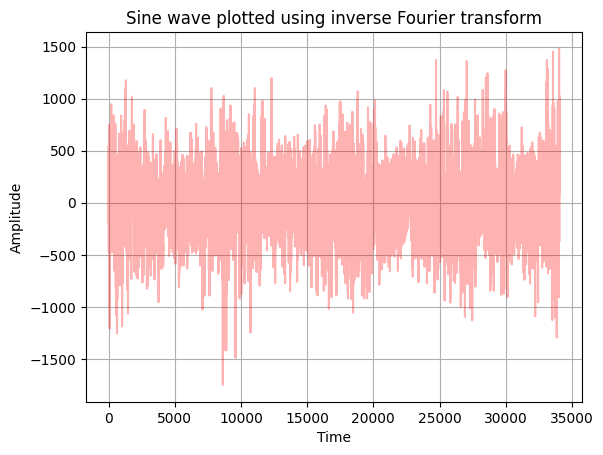

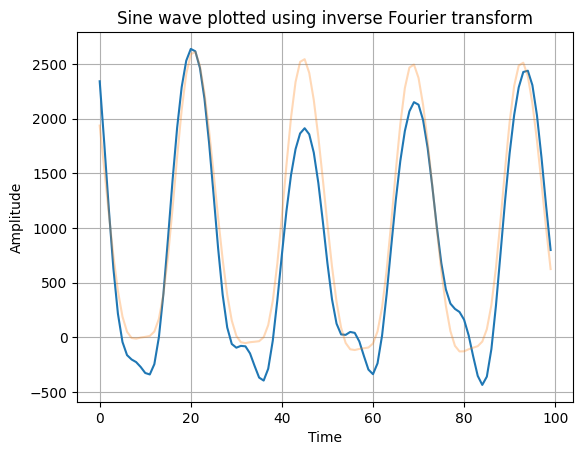

In [41]:
reconstruit_filtré, compteur= filtrage(fft_values,threshold = 0.6*10**6)

# plt.plot(signal)
# plt.plot(reconstruit_filtré,alpha=0.3)
plt.plot(signal - reconstruit_filtré,alpha=0.3, c='r')
plt.title("Sine wave plotted using inverse Fourier transform")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plt.plot(signal[400:500])
plt.plot(reconstruit_filtré[400:500],alpha=0.3)
plt.title("Sine wave plotted using inverse Fourier transform")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [42]:
reconstruit_filtré

array([ 13.17273063-2.27373675e-13j,  20.17238859+3.43958152e-13j,
        14.79483856-2.43633239e-13j, ..., 110.39388499+2.32147634e-13j,
        24.88553422+4.38864223e-13j,   4.37425416+9.81207140e-13j])

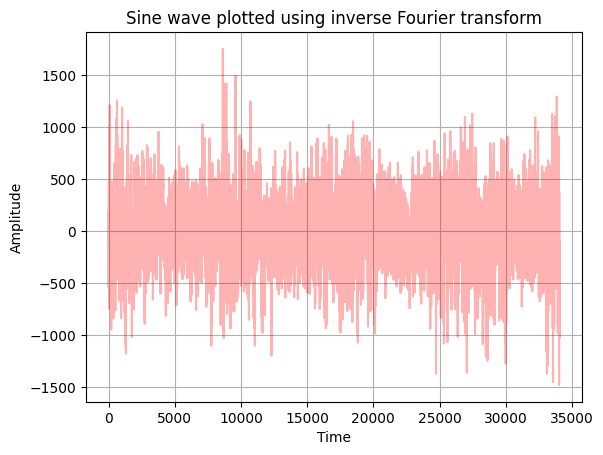

In [43]:
# plt.plot(reconstruit_filtré)
# plt.plot(reconstruit_filtré,alpha=0.3)
plt.plot(reconstruit_filtré - df_A["TS"],alpha=0.3, c='r')
plt.title("Sine wave plotted using inverse Fourier transform")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()